# **Week1 복습과제**
<br>**Content:**
1. [Basics of Pytorch]
    - Matrices
    - Math
    - Variable
1. [Linear Regression]
1. [Logistic Regression]
1. [Artificial Neural Network (ANN)]
1. [Concolutional Neural Network (CNN)]
1. Recurrent Neural Network (RNN)
1. Long-Short Term Memory (LSTM)


In [28]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive/')

#input data: 첨부된 .csv 파일 사용해주세요.
import os
print(os.listdir("/content/drive/MyDrive/Colab Notebooks/EURON/Week1"))

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
['Week1예습과제정선영.ipynb', 'sample_submission.csv', 'test.csv', 'train.csv', 'Week1복습과제_정선영.ipynb']


<a id="1"></a> <br>
## 1. Basics of Pytorch
### Matrices
- In pytorch, matrix(array) is called tensors.
- 3*3 matrix koy. This is 3x3 tensor.
- Lets look at array example with numpy that we already know.
    - We create numpy array with np.numpy() method
    - Type(): type of the array. In this example it is numpy
    - np.shape(): shape of the array. Row x Column

In [29]:
# import numpy library
import numpy as np

# numpy array
array = [[1,2,3],[4,5,6]]
first_array = np.array(array) # 2 by 3 array
print("Array Type: {}".format(type(first_array))) # type
print("Array Shape: {}".format(first_array.shape)) # shape
print(first_array)

Array Type: <class 'numpy.ndarray'>
Array Shape: (2, 3)
[[1 2 3]
 [4 5 6]]


- We looked at numpy array.
- Now examine how we implement tensor(pytorch array)
- import pytorch library with import torch
- We create tensor with torch.Tensor() method
- type: type of the array. In this example it is tensor
- shape: shape of the array. Row x Column

In [30]:
# import pytorch library
import torch

# pytorch array
tensor = torch.Tensor(array)
print("Array Type: {}".format(type(tensor))) # type
print("Array Shape: {}".format(tensor.shape)) # shape
print(tensor)

Array Type: <class 'torch.Tensor'>
Array Shape: torch.Size([2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


- Allocation is one of the most used technique in coding. Therefore lets learn how to make it with pytorch.
- In order to learn, compare numpy and tensor
    - np.ones() = torch.ones()
    - np.random.rand() = torch.rand()

In [31]:
# numpy ones
print("Numpy {}\n".format(np.ones((2,3)))) # 2 by 3 in numpy

# pytorch ones
print(torch.ones((2,3))) # 2 by 3 in tensor

Numpy [[1. 1. 1.]
 [1. 1. 1.]]

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [32]:
# numpy random
print("Numpy {}\n".format(np.random.rand(2,3))) # 2 by 3 random numpy array

# pytorch random
print(torch.rand(2,3)) # 2 by 3 random tensor

Numpy [[0.4132753  0.92139441 0.13786201]
 [0.26603859 0.32484863 0.86762542]]

tensor([[0.1944, 0.3862, 0.8367],
        [0.2164, 0.2008, 0.9878]])



- Lets look at conversion between tensor and numpy arrays.
    - torch.from_numpy(): from numpy to tensor
    - numpy(): from tensor to numpy

In [33]:
# random numpy array
array = np.random.rand(2,2)
print("{} {}\n".format(type(array),array))

# from numpy to tensor
from_numpy_to_tensor = torch.from_numpy(array) # numpy -> tensor 변환
print("{}\n".format(from_numpy_to_tensor))

# from tensor to numpy
tensor = from_numpy_to_tensor
from_tensor_to_numpy = np.array(tensor) # tensor -> numpy 변환
print("{} {}\n".format(type(from_tensor_to_numpy),from_tensor_to_numpy))

<class 'numpy.ndarray'> [[0.59864323 0.24876172]
 [0.87869749 0.70211072]]

tensor([[0.5986, 0.2488],
        [0.8787, 0.7021]], dtype=torch.float64)

<class 'numpy.ndarray'> [[0.59864323 0.24876172]
 [0.87869749 0.70211072]]



### Basic Math with Pytorch
- Resize: view()
- a and b are tensor.
- Addition: torch.add(a,b) = a + b
- Subtraction: a.sub(b) = a - b
- Element wise multiplication: torch.mul(a,b) = a * b
- Element wise division: torch.div(a,b) = a / b
- Mean: a.mean()
- Standart Deviation (std): a.std()

In [34]:
# create tensor
tensor = torch.ones(3,3)
print("\n",tensor)

# Resize
print("{}{}\n".format(tensor.view(9).shape,tensor.view(9)))

# Addition
print("Addition: {}\n".format(torch.add(tensor,tensor)))

# Subtraction
print("Subtraction: {}\n".format(tensor.sub(tensor)))

# Element wise multiplication
print("Element wise multiplication: {}\n".format(torch.mul(tensor,tensor)))

# Element wise division
print("Element wise division: {}\n".format(torch.div(tensor,tensor)))

# Mean
tensor = torch.Tensor([1,2,3,4,5])
print("Mean: {}".format(tensor.mean()))

# Standart deviation (std)
print("std: {}".format(tensor.std()))


 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
torch.Size([9])tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])

Addition: tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

Subtraction: tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

Element wise multiplication: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Element wise division: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Mean: 3.0
std: 1.5811388492584229


### Variables
- It accumulates gradients.
- We will use pytorch in neural network. And as you know, in neural network we have backpropagation where gradients are calculated. Therefore we need to handle gradients. If you do not know neural network, check my deep learning tutorial first because I will not explain detailed the concepts like optimization, loss function or backpropagation.
- The Difference between variables and tensor is that a variable accumulates gradients.
- We can make math operations with variables, too.
- we need variables in order to make backward propagation

In [35]:
# import variable from pytorch library
from torch.autograd import Variable

# define variable
var = Variable(torch.ones(3), requires_grad = True)
var

tensor([1., 1., 1.], requires_grad=True)

- Assume we have equation y = x^2
- Define x = [2,4] variable
- After calculation we find that y = [4,16] (y = x^2)
- Recap o equation is that o = (1/2)*sum(y) = (1/2)*sum(x^2)
- deriavative of o = x
- Result is equal to x so gradients are [2,4]
- Lets implement

In [36]:
# basic backward propagation
# we have an equation that is y = x^2
array = [2,4]
tensor = torch.Tensor(array)
x = Variable(tensor, requires_grad = True)
y = x**2
print(" y =  ",y)

# recap o equation o = 1/2*sum(y)
o = (1/2)*sum(y)
print(" o =  ",o)

# backward
o.backward() # calculates gradients

# Variables accumulates gradients. In this part there is only one variable x.
# Therefore variable x should be have gradients
# Lets look at gradients with x.grad
print("gradients: ",x.grad)

 y =   tensor([ 4., 16.], grad_fn=<PowBackward0>)
 o =   tensor(10., grad_fn=<MulBackward0>)
gradients:  tensor([2., 4.])


<a id="2"></a> <br>
### 2. Linear Regression
- Detailed linear regression tutorial at: Linear Regression tutorial_ https://www.kaggle.com/kanncaa1/machine-learning-tutorial-for-beginners

- y = Ax + B.
    - A = slope of curve
    - B = bias (point that intersect y-axis)

-  If the car price is low, we sell more car. If the car price is high, we sell less car. This is the fact that we know and we have data set about this fact.

- The goal is to guess the number of sold cars when the car price is 100.

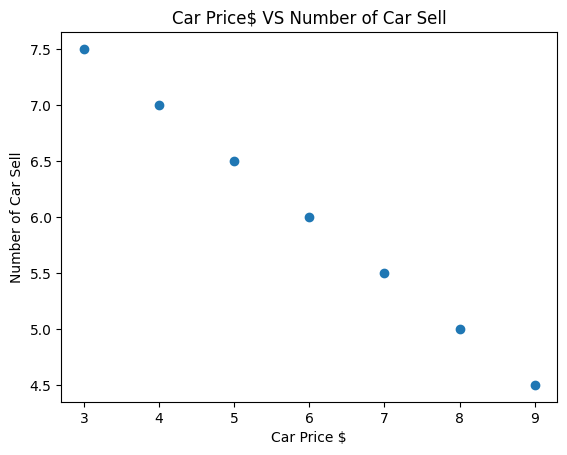

In [37]:
# Define car prices
car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array,dtype=np.float32) # numpy array로 변환
car_price_np = car_price_np.reshape(-1,1) #reshape
car_price_tensor = Variable(torch.from_numpy(car_price_np)) # define variable

# lets define number of car sell
number_of_car_sell_array = [ 7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array,dtype=np.float32) # numpy array 로 변환
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1) #reshape
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np)) # define variable

# lets visualize our data
import matplotlib.pyplot as plt
plt.scatter(car_prices_array,number_of_car_sell_array)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ VS Number of Car Sell")
plt.show()

- Now this plot is our collected data
- We have a question that is what will be number of car sell if the car price is 100$
- In order to solve this question we need to use linear regression.
- We need to line fit into this data. Aim is fitting line with minimum error.
---
- **Steps of Linear Regression**
    1. create LinearRegression class
    1. define model from this LinearRegression class
    1. MSE: Mean squared error
    1. Optimization (SGD:stochastic gradient descent)
    1. Backpropagation
    1. Prediction

epoch 0, loss 14.403230667114258
epoch 50, loss 4.553202152252197
epoch 100, loss 3.076789379119873
epoch 150, loss 2.079116106033325
epoch 200, loss 1.4049453735351562
epoch 250, loss 0.949380099773407
epoch 300, loss 0.6415358781814575
epoch 350, loss 0.4335123896598816
epoch 400, loss 0.29294252395629883
epoch 450, loss 0.19795383512973785
epoch 500, loss 0.1337653547525406
epoch 550, loss 0.09039095789194107
epoch 600, loss 0.0610809326171875
epoch 650, loss 0.041275084018707275
epoch 700, loss 0.027891378849744797
epoch 750, loss 0.018847299739718437
epoch 800, loss 0.012735887430608273
epoch 850, loss 0.00860618893057108
epoch 900, loss 0.005815320648252964
epoch 950, loss 0.003929674159735441
epoch 1000, loss 0.002655372489243746


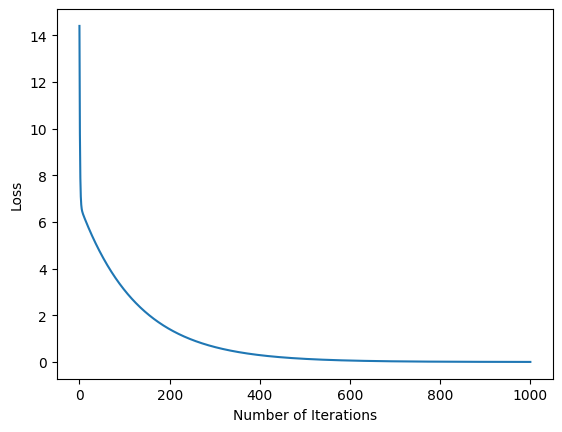

In [38]:
# Linear Regression with Pytorch

# libraries
import torch
from torch.autograd import Variable
import torch.nn as nn
import warnings
warnings.filterwarnings("ignore")

# create class
class LinearRegression(nn.Module):
    def __init__(self,input_size,output_size):
        # super function. It inherits from nn.Module and we can access everythink in nn.Module
        super(LinearRegression,self).__init__()
        # Linear function.
        self.linear = nn.Linear(input_dim,output_dim) # apply linear function

    def forward(self,x):
        return self.linear(x)

# define model
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim,output_dim) # 선형회귀모델 사용

# MSE
mse = nn.MSELoss() #MSELoss 사용

# Optimization (find parameters that minimize error)
learning_rate = 0.02   # how fast we reach best parameters
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate) # SGD = Stochastic Gradient Descent, 확률적 경사 하강법

# train model
loss_list = []
iteration_number = 1001
for iteration in range(iteration_number):

    # optimization
    optimizer.zero_grad() # gradient 초기화

    # Forward to get output
    results = model(car_price_tensor)

    # Calculate Loss
    loss = mse(results, number_of_car_sell_tensor) #MSE

    # backward propagation
    loss.backward()

    # Updating parameters
    optimizer.step()

    # store loss
    loss_list.append(loss.item())

    # print loss
    if(iteration % 50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))

plt.plot(range(iteration_number),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

- Number of iteration is 1001.
- Loss is almost zero that you can see from plot or loss in epoch number 1000.
- Now we have a trained model.
- While usign trained model, lets predict car prices.

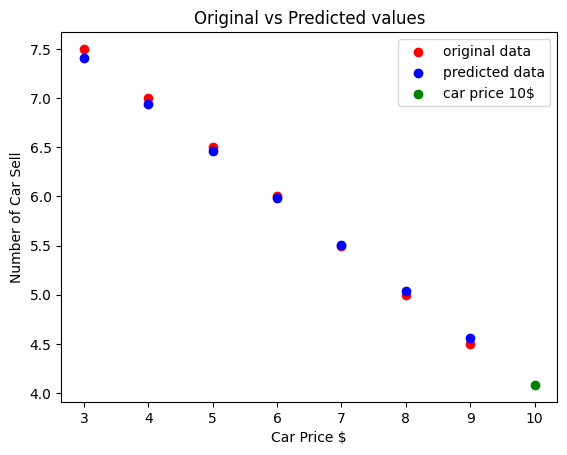

In [39]:
# predict our car price
predicted = model(car_price_tensor).data.numpy()
plt.scatter(car_prices_array,number_of_car_sell_array,label = "original data",color ="red") # original data
plt.scatter(car_prices_array,predicted,label = "predicted data",color ="blue") # predicted data

# predict if car price is 10$, what will be the number of car sell?
predicted_10 = model(torch.Tensor(([10]))).data.numpy()
plt.scatter(10,predicted_10.data,label = "car price 10$",color ="green")
plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted values")
plt.show()

<a id="3"></a> <br>
### Logistic Regression
- Linear regression is not good at classification.
- We use logistic regression for classification.
- linear regression + logistic function(softmax) = logistic regression
- Check my deep learning tutorial. There is detailed explanation of logistic regression.
    - https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners
- **Steps of Logistic Regression**
    1. Import Libraries
    1. Prepare Dataset
        - We use MNIST dataset.
        - There are 28*28 images and 10 labels from 0 to 9
        - Data is not normalized so we divide each image to 255 that is basic normalization for images.
        - In order to split data, we use train_test_split method from sklearn library
        - Size of train data is 80% and size of test data is 20%.
        - Create feature and target tensors. At the next parts we create variable from these tensors. As you remember we need to define variable for accumulation of gradients.
        - batch_size = batch size means is that for example we have data and it includes 1000 sample. We can train 1000 sample in a same time or we can divide it 10 groups which include 100 sample and train 10 groups in order. Batch size is the group size. For example, I choose batch_size = 100, that means in order to train all data only once we have 336 groups. We train each groups(336) that have batch_size(quota) 100. Finally we train 33600 sample one time.
        - epoch: 1 epoch means training all samples one time.
        - In our example: we have 33600 sample to train and we decide our batch_size is 100. Also we decide epoch is 29(accuracy achieves almost highest value when epoch is 29). Data is trained 29 times. Question is that how many iteration do I need? Lets calculate:
            - training data 1 times = training 33600 sample (because data includes 33600 sample)
            - But we split our data 336 groups(group_size = batch_size = 100) our data
            - Therefore, 1 epoch(training data only once) takes 336 iteration
            - We have 29 epoch, so total iterarion is 9744(that is almost 10000 which I used)
        - TensorDataset(): Data set wrapping tensors. Each sample is retrieved by indexing tensors along the first dimension.
        - DataLoader(): It combines dataset and sample. It also provides multi process iterators over the dataset.
        - Visualize one of the images in dataset
    1. Create Logistic Regression Model
        - Same with linear regression.
        - However as you expect, there should be logistic function in model right?
        - In pytorch, logistic function is in the loss function where we will use at next parts.
    1. Instantiate Model
        - input_dim = 28*28 # size of image px*px
        - output_dim = 10  # labels 0,1,2,3,4,5,6,7,8,9
        - create model
    1. Instantiate Loss
        - Cross entropy loss
        - It calculates loss that is not surprise :)
        - It also has softmax(logistic function) in it.
    1. Instantiate Optimizer
        - SGD Optimizer
    1. Traning the Model
    1. Prediction
- As a result, as you can see from plot, while loss decreasing, accuracy(almost 85%) is increasing and our model is learning(training).    

In [40]:
# Import Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split

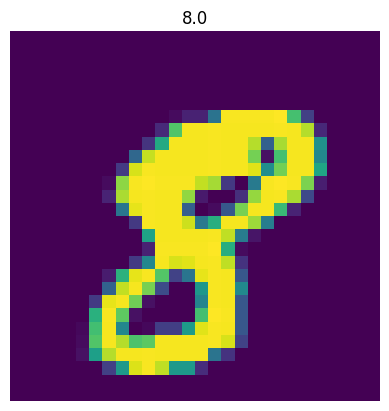

In [41]:
# Prepare Dataset
# load data
train = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/EURON/Week1/train.csv",dtype = np.float32)

# split data into features(pixels) and labels(numbers from 0 to 9)
targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values/255 # normalization

# train test split. Size of train data is 80% and size of test data is 20%.
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42)

# create feature and targets tensor for train set. As you remember we need variable to accumulate gradients. Therefore first we create tensor, then we will create variable
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor)
## 힌트: PyTorch Tesnor를 생성해주세요!
## 어떤 데이터를 PyTorch Tensor를 변환하고, 어떤 데이터타입을 선택할지 직접 작성해주세요

# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = TensorDataset(featuresTrain,targetsTrain)
test = TensorDataset(featuresTest,targetsTest)
## 힌트: 입력 데이터와 레이블을 텐서로 변환하여, 이들을 TensorDataset으로 묶어 train과 test 데이터셋을 구성합니다
## TensorDataset에는 두 개의 텐서를 전달해야 하며, 각각 특징과 레이블에 해당합니다.
## 첫 번째 텐서는 입력 데이터, 두 번째 텐서는 정답 데이터이며 입력 데이터와 정답 데이터의 샘플 수가 동일해야 합니다.

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

# visualize one of the images in data set
plt.imshow(features_numpy[10].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[10]))
plt.savefig('graph.png')
plt.show()

In [42]:
# Create Logistic Regression Model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        # Linear part
        self.linear = nn.Linear(input_dim, output_dim)
        # There should be logistic function right?
        # However logistic function in pytorch is in loss function
        # So actually we do not forget to put it, it is only at next parts

    def forward(self, x):
        out = self.linear(x)
        return out

# Instantiate Model Class
input_dim = 28*28 # size of image px*px
output_dim = 10  # labels 0,1,2,3,4,5,6,7,8,9

# create logistic regression model
model = LogisticRegressionModel(input_dim, output_dim)

# Cross Entropy Loss
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)
## 힌트: 모델 파라미터를 model.parameters()로 넘겨줍니다
## 학습률(learning rate)은 훈련 속도를 결정합니다
## 최적화 함수가 SGD이므로, torch.optim.SGD를 사용합니다

In [43]:
# Traning the Model
count = 0
loss_list = []
iteration_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # Define variables
        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)

        # Clear gradients
        optimizer.zero_grad()

        # Forward propagation
        outputs = model(train)

        # Calculate softmax and cross entropy loss
        loss = error(outputs, labels)

        # Calculate gradients
        loss.backward()

        # Update parameters
        optimizer.step()

        count += 1

        # Prediction
        if count % 50 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader:
                test = Variable(images.view(-1, 28*28))

                # Forward propagation
                outputs = model(test)

                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]

                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / float(total)

            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {}%'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 1.8443795442581177  Accuracy: 64.11904907226562%
Iteration: 1000  Loss: 1.618649959564209  Accuracy: 73.8452377319336%
Iteration: 1500  Loss: 1.2922697067260742  Accuracy: 77.29762268066406%
Iteration: 2000  Loss: 1.2039602994918823  Accuracy: 79.38095092773438%
Iteration: 2500  Loss: 1.0514029264450073  Accuracy: 80.5952377319336%
Iteration: 3000  Loss: 0.9487103223800659  Accuracy: 81.58333587646484%
Iteration: 3500  Loss: 0.9081853628158569  Accuracy: 82.17857360839844%
Iteration: 4000  Loss: 0.763083815574646  Accuracy: 82.58333587646484%
Iteration: 4500  Loss: 0.9713425636291504  Accuracy: 83.03571319580078%
Iteration: 5000  Loss: 0.8090456128120422  Accuracy: 83.36904907226562%
Iteration: 5500  Loss: 0.7677990198135376  Accuracy: 83.64286041259766%
Iteration: 6000  Loss: 0.8854749798774719  Accuracy: 83.94047546386719%
Iteration: 6500  Loss: 0.6686578989028931  Accuracy: 84.27381134033203%
Iteration: 7000  Loss: 0.721173107624054  Accuracy: 84.6547622680664%

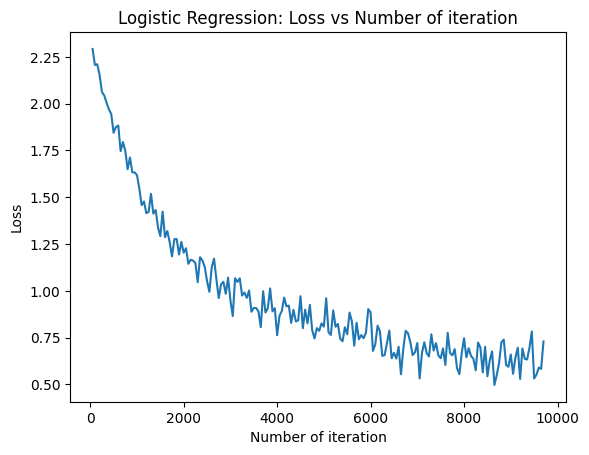

In [44]:
# visualization
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Logistic Regression: Loss vs Number of iteration")
plt.show()

<a id="4"></a> <br>
### Artificial Neural Network (ANN)
- Logistic regression is good at classification but when complexity(non linearity) increases, the accuracy of model decreases.
- Therefore, we need to increase complexity of model.
- In order to increase complexity of model, we need to add more non linear functions as hidden layer.
- I am saying again that if you do not know what is artificial neural network check my deep learning tutorial because I will not explain neural network detailed here, only explain pytorch.
- Artificial Neural Network tutorial: https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners
- What we expect from artificial neural network is that when complexity increases, we use more hidden layers and our model can adapt better. As a result accuracy increase.
- **Steps of ANN:**
    1. Import Libraries
        - In order to show you, I import again but we actually imported them at previous parts.
    1. Prepare Dataset
        - Totally same with previous part(logistic regression).
        - We use same dataset so we only need train_loader and test_loader.
        - We use same batch size, epoch and iteration numbers.
    1. Create ANN Model
        - We add 3 hidden layers.
        - We use ReLU, Tanh and ELU activation functions for diversity.
    1. Instantiate Model Class
        - input_dim = 28*28 # size of image px*px
        - output_dim = 10  # labels 0,1,2,3,4,5,6,7,8,9
        - Hidden layer dimension is 150. I only choose it as 150 there is no reason. Actually hidden layer dimension is hyperparameter and it should be chosen and tuned. You can try different values for hidden layer dimension and observe the results.
        - create model
    1. Instantiate Loss
        - Cross entropy loss
        - It also has softmax(logistic function) in it.
    1. Instantiate Optimizer
        - SGD Optimizer
    1. Traning the Model
    1. Prediction
- As a result, as you can see from plot, while loss decreasing, accuracy is increasing and our model is learning(training).
- Thanks to hidden layers model learnt better and accuracy(almost 95%) is better than accuracy of logistic regression model.

In [45]:
# Import Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable

In [46]:
# Create ANN Model
class ANNModel(nn.Module):

    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()

        # Linear function 1: 784 --> 150
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        # Non-linearity 1
        self.relu1 = nn.ReLU()

        # Linear function 2: 150 --> 150
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.tanh2 = nn.Tanh()

        # Linear function 3: 150 --> 150
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3
        self.elu3 = nn.ELU()

        # Linear function 4 (readout): 150 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)

        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.tanh2(out)

        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.elu3(out)

        # Linear function 4 (readout)
        out = self.fc4(out)
        return out

# instantiate ANN
input_dim = 28*28
hidden_dim = 150 #hidden layer dim is one of the hyper parameter and it should be chosen and tuned. For now I only say 150 there is no reason.
output_dim = 10

# Create ANN
model = ANNModel(input_dim, hidden_dim, output_dim)

# Cross Entropy Loss
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
## 힌트: 모델 파라미터를 model.parameters()로 넘겨줍니다
## 학습률(learning rate)은 훈련 속도를 결정합니다
## 최적화 함수가 SGD이므로, torch.optim.SGD를 사용합니다

In [47]:
# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)

        # Clear gradients
        optimizer.zero_grad()

        # Forward propagation
        outputs = model(train)

        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)

        # Calculating gradients
        loss.backward()

        # Update parameters
        optimizer.step()

        count += 1

        if count % 50 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader:

                test = Variable(images.view(-1, 28*28))

                # Forward propagation
                outputs = model(test)

                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]

                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / float(total)

            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.7740018963813782  Accuracy: 78.80952453613281 %
Iteration: 1000  Loss: 0.4621894359588623  Accuracy: 87.28571319580078 %
Iteration: 1500  Loss: 0.23429328203201294  Accuracy: 89.5952377319336 %
Iteration: 2000  Loss: 0.3054904043674469  Accuracy: 90.6547622680664 %
Iteration: 2500  Loss: 0.3146222233772278  Accuracy: 91.83333587646484 %
Iteration: 3000  Loss: 0.12774281203746796  Accuracy: 92.63095092773438 %
Iteration: 3500  Loss: 0.2575947642326355  Accuracy: 93.41666412353516 %
Iteration: 4000  Loss: 0.07206632941961288  Accuracy: 93.85713958740234 %
Iteration: 4500  Loss: 0.31665700674057007  Accuracy: 94.35713958740234 %
Iteration: 5000  Loss: 0.0944162905216217  Accuracy: 94.78571319580078 %
Iteration: 5500  Loss: 0.1793961375951767  Accuracy: 94.82142639160156 %
Iteration: 6000  Loss: 0.1858319342136383  Accuracy: 95.03571319580078 %
Iteration: 6500  Loss: 0.09476835280656815  Accuracy: 95.4047622680664 %
Iteration: 7000  Loss: 0.11991297453641891  Accura

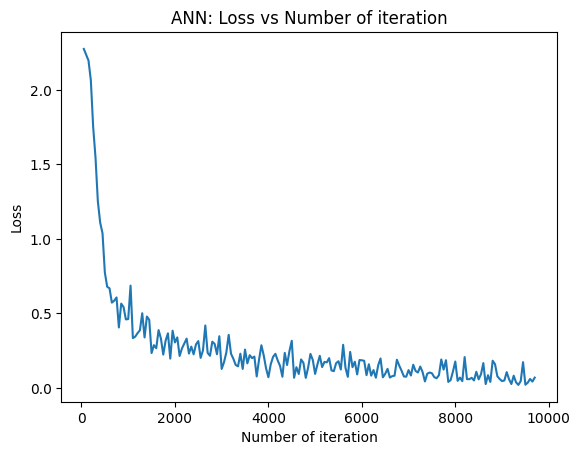

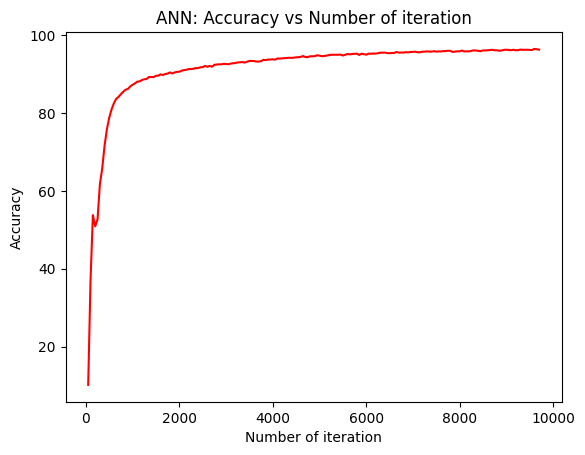

In [48]:
# visualization loss
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()